<img src='./pic/sharif-main-logo.png' alt="SUT logo" width=300 height=300 align=left class="saturate" > <br>

<div dir=ltr align=center>
<font color=0F5298 size=7>
    Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2024 <br>
<font color=3C99D size=5>
    Practical Assignment 1 - Supervised Learning <br>
<font color=696880 size=4>
    Erfan Salima, Nikan Vasei, Fatemeh Shiri, Sarina Heshmati

____

# Personal Data

In [103]:
student_number = '401105901'
Name = 'Amirardalan'
Last_Name = 'Dehghanpour' 

# Libraries

In [104]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures

# Polynomial Regression & Bias-Variance Tradeoff (100 Points)

<font size=4>
Author: Nikan Vasei

## Introduction
In this part, we will explore the **bias-variance tradeoff** using polynomial regression models. Polynomial regression allows us to model complex relationships between an independent variable $X$ and a dependent variable $y$ by introducing higher-degree polynomial terms. However, increasing the complexity of the model can lead to **overfitting** or **underfitting**, which are key concepts in the bias-variance tradeoff.

## Plan
1. **Create a synthetic dataset**: Use the provided quadratic function to generate $X$ and $y$ with noise.
2. **Split the dataset**: Divide the data into training and test sets to evaluate model generalization.
3. **Train polynomial models**: Fit polynomial regression models with degrees ranging from 1 to 10 (or more).
4. **Evaluate performance**: Calculate the MSE for both training and test sets and compare the errors for different polynomial degrees.
5. **Analyze the results**: Use plots to visualize how the error on the training and test sets changes as the model complexity increases.

## Objective
The objective is to determine the degree of the polynomial that best models the relationship between $X$ and $y$ and balances both underfitting and overfitting, i.e., the degree that achieves the best generalization.

## 1. Create a synthetic dataset (15 Points)

Your first task is to define a function that generates a dataset with 1000 samples. The input values for the independent variable $X$ should be randomly selected within the range of **-3 to 3**. To make the dataset more realistic, add noise to the output using a normal distribution with a mean of 0 and a standard deviation of 10.

The relationship between the independent variable $X$ and the dependent variable $y$ is modeled by the following equation:

$$
y = 0.2X^6 - 0.5X^5 + 2X^4 - 5X^3 + 3X^2 - 10X + 5 + \text{noise}
$$

In [105]:
def generate_dataset(range_start, range_end, num_samples=1000, noise_std=10.0):
    # TODO: Generate dataset
    X=np.random.uniform(range_start, range_end,num_samples)
    y=0.2 * X**6 -0.5 * X**5 + 2* X**4 -5* X**3 + 3*X**2 -10*X+5+ np.random.normal(0,noise_std,num_samples)
    return X, y

Use a scatter plot to visualize the relationship between $X$ and $y$. This will help you understand the structure of the generated data before moving on to fitting models.

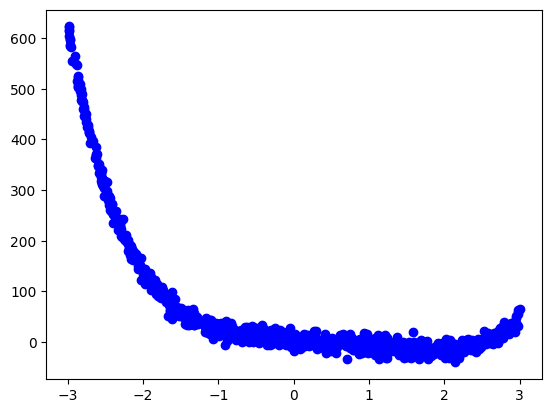

In [106]:
X, y = generate_dataset(-3, 3)

# TODO: Visualize the dataset using scatter
plt.scatter(X,y,c="blue")

## 2. Splitting the Dataset (5 Points)

In this task, you should split the dataset into three parts:
1. **Training Set**
2. **In-Range Test Set**: This set should contain data within the same range as the training set.
3. **Out-of-Range Test Set**: This set should contain data in the range **[5, 7]**.

Ensure that the two test sets (In-Range and Out-of-Range) have the same length. You can use the `train_test_split` function from the `sklearn` library for convenience in splitting the data.

In [107]:
# TODO: Split dataset into the training and the in-range testing sets
X_train, X_testing, y_train, y_testing = train_test_split(
    X, y, test_size=0.2, random_state=42)
# TODO: Generate the out-of-range testing set
X_out_of_range,y_out_of_range=generate_dataset(5,7,len(X_testing),10)

Again, you can use a scatter plot (or similar plots) to visualize the different sets and see their overall distributions.

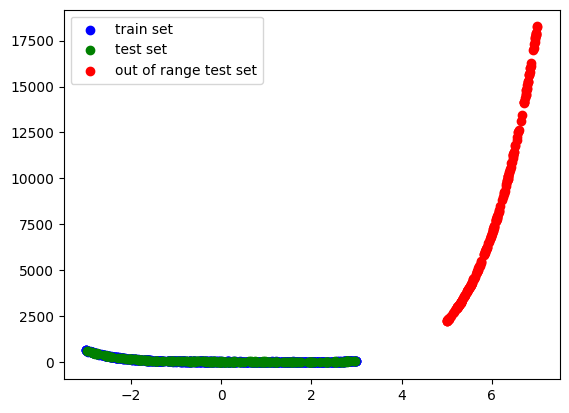

In [108]:
# TODO: Visualize the sets using scatter (or other plots)
plt.scatter(X_train,y_train,c="blue",label='train set')
plt.scatter(X_testing,y_testing,c="green",label='test set')
plt.scatter(X_out_of_range,y_out_of_range,c="red",label='out of range test set')
plt.legend()

## 3. Polynomial Regression Training (25 Points)

In this task, you should train polynomial regression models with varying degrees, ranging from degree = 2 to degree = 9. You can use the `preprocessing`, `linear_model`, and `pipeline` classes from the `sklearn` library to create and evaluate these models.

In [109]:
def train_models(X, y, degree):
    # TODO: Create and train a model based on the given degree
 model=make_pipeline(PolynomialFeatures(degree),LinearRegression())
 model.fit(X.reshape(-1,1),y)
 return model

In [110]:
models = {}
degree = 9
for i in range(2,degree+1):
    new_model=train_models(X_train,y_train,i)
    models[i]=new_model
# TODO: Add the trained models with different degrees to the dict

## 4. Model Evaluation (20 Points)

In this task, you should evaluate the polynomial regression models on both test sets (In-Range Test Set and Out-of-Range Test Set) using Mean Squared Error (MSE). This evaluation will help you understand how well each model generalizes to different data ranges.

For each polynomial degree, compute the MSE on both the in-range test set and the out-of-range test set using the `mean_squared_error` function from the `sklearn` library.

In [111]:
def evaluate_models(models, X_testing, y_testing):
    losses={}
    # TODO: Calculate MSE of each model (on the input test set).
    for i in range(2,degree+1):
     y_pred = models[i].predict(X_testing.reshape(-1,1))
     losses[i]=mean_squared_error(y_testing,y_pred)   
    return losses

In [112]:
# TODO: Evaluate models on both the train and the test sets.
loss_train=evaluate_models(models,X_train,y_train)
loss_test=evaluate_models(models,X_testing,y_testing)
loss_out_of_range=evaluate_models(models,X_out_of_range,y_out_of_range)


## 5. Analyzing Model Scores (20 Points)

In this task, you will visualize and analyze the performance of polynomial regression models by plotting the **logarithm** (to better visualize differences) of losses (Mean Squared Error, MSE) for both training and test set and also by printing the losses related to each degree.

Make sure to train each model a few times to get a sense of variability in the results.

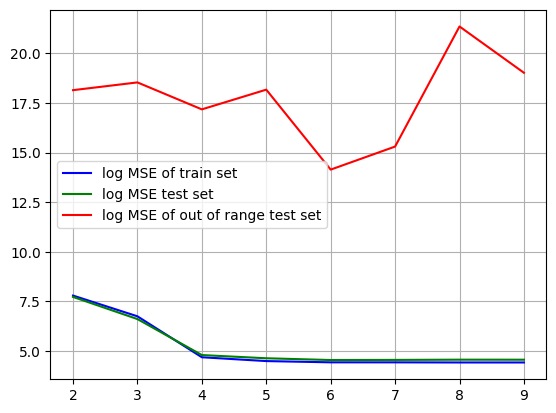

In [113]:
# TODO: Calculate the log MSE for both the train and the test sets based on the model degrees from 2 to 9
log_loss_train=[]
log_loss_test=[]
log_loss_out=[]
degrees=list(range(2,degree+1))
for i in range(2,degree+1):
    log_loss_train.append(np.log(loss_train[i]))
    log_loss_test.append(np.log(loss_test[i]))
    log_loss_out.append(np.log(loss_out_of_range[i]))  
# TODO: Plot the log MSE results
plt.plot(degrees,log_loss_train,c="blue",label='log MSE of train set')
plt.plot(degrees,log_loss_test,c="green",label='log MSE test set')
plt.plot(degrees,log_loss_out,c="red",label='log MSE of out of range test set')
plt.legend()
plt.grid()
plt.show()   


In [114]:
# TODO: Print each model loss on the training and the two test sets
print("Degree  Train MSE  In-Range TEST MSE  Out-of-Range Test MSE")
for i in range(len(log_loss_train)):
    print(f"{i+2}        {log_loss_train[i]:.2f}       {log_loss_test[i]:.2f}                     {log_loss_out[i]:.2f}")

Degree  Train MSE  In-Range TEST MSE  Out-of-Range Test MSE
2        7.80       7.73                     18.15
3        6.75       6.61                     18.54
4        4.69       4.80                     17.18
5        4.50       4.64                     18.17
6        4.43       4.55                     14.14
7        4.43       4.55                     15.30
8        4.42       4.57                     21.36
9        4.42       4.56                     19.02


## Conclusion (15 Points)

1. Based on your analysis of the training set loss, in-range test set loss, and out-of-range test set loss across different polynomial degrees, summarize what you have learned about the bias-variance tradeoff. How do these losses illustrate the tradeoff between model complexity and performance?

- <span style="color:cyan;">**Answer:** in training set we saw that with increasing degree of polynomial regression, bias can be lower but after degrees 5 or 6 this difference will not be so much and also variance can be bigger with increasing degree and complexity of model increases ,in test set conclusion is so similar to train-test but in out-of-range test we saw that mse gets bigger after degree 6 and shows complexity of model can't be useful always and bias and variance increased</span>

2. Reflecting on the trends observed in the losses as polynomial degree increases, what conclusions can you draw about the effects of model complexity on overfitting and underfitting? How does this understanding help in selecting the appropriate polynomial degree for a model?

- <span style="color:cyan;">**Answer:** when we increase complexity of our model for example increase degree of polynomial regression bias can reduce and we can avoid danger of underfitting with this method but should be careful to avoid overfitting beacuse with increasing complexity of model,our model highly fitted to train set and will overfit for another test sets,now we conculde should choose a complexity to affect on both bias and variance tradeoff on the best way ,some methods such as regularization can be useful</span>

# Regularization (50 Points)

<font size=4>
Author: Fatemeh Shiri

# **Introduction**

In this part, you will work with a real dataset that includes information about the cost of treatment of different patients. The cost of treatment depends on many factors: diagnosis, type of clinic, city of residence, age and so on. <a ref= 'https://github.com/stedy/Machine-Learning-with-R-datasets'>Reference</a>

Columns available:

* age: age of primary beneficiary

* sex: insurance contractor gender, female, male

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* charges: Individual medical costs billed by health insurance

# Plan

- First, you will start by fitting a basic regression model using scikit-learn (sklearn) to establish a baseline for comparison. This basic regression model will serve as a reference point for evaluating the performance of more sophisticated models incorporating regularization techniques.

- Furthermore, you will apply L1 (Lasso) and L2 (Ridge) regularization techniques to refine your predictions and evaluate the impact of these methods on the accuracy of your results. Regularization is a technique used to prevent overfitting by adding a penalty term to the loss function, encouraging simpler models with smaller coefficients. L1 regularization (Lasso) encourages sparsity by penalizing the absolute values of coefficients, while L2 regularization (Ridge) penalizes the square of coefficients. 

# Load and Explore

Load the dataset (as a dataframe) using pandas and display the top 5 rows of the dataframe

In [115]:
file_path = "./InsuranceData.csv"

df = pd.read_csv(file_path)

print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


Get a brief description and do some EDA to get familiar with the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


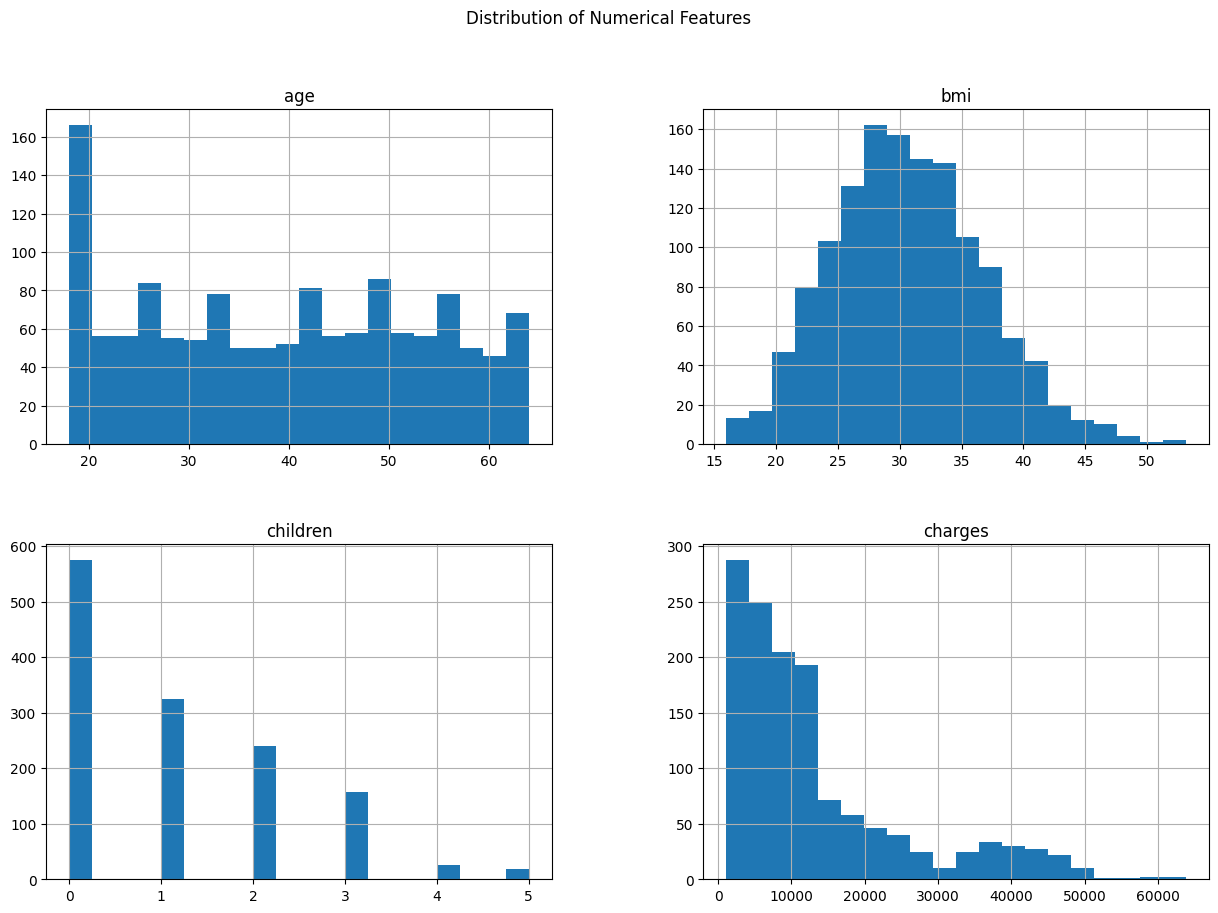

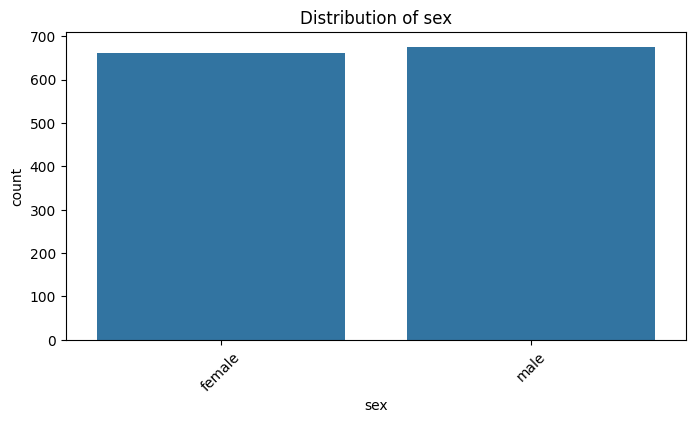

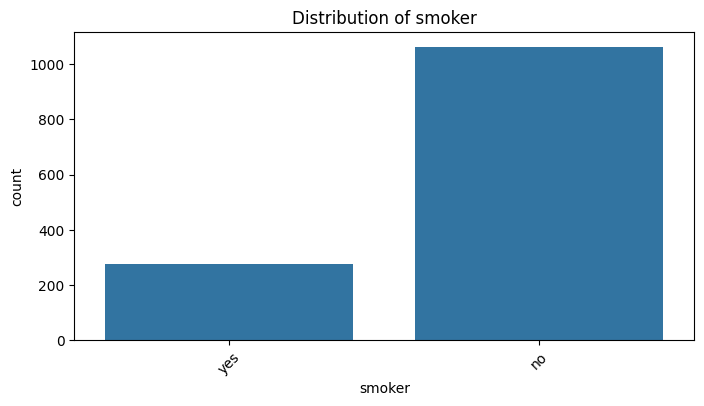

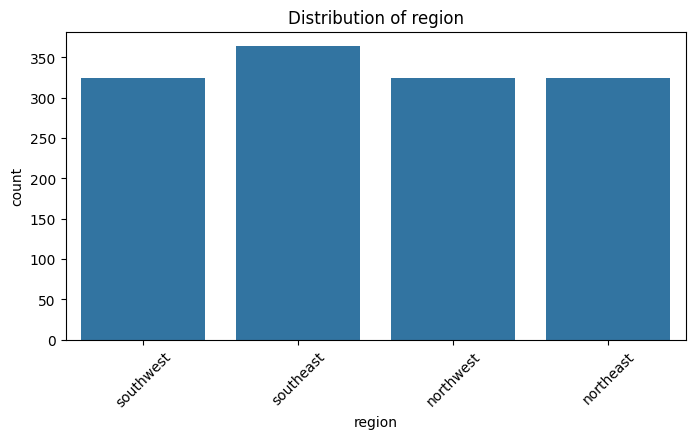

In [116]:
# TODO: you can use .info() and .description()
df.info()
df.describe()
print(df.isnull().sum())
df_clean=df.dropna()
df.hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Features')
plt.show()
for column in df.select_dtypes(include=['object']):
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.show()

# Preprocessing

In [117]:
# TODO: apply any pre processing method you think is necessary
# Options: Normalization, Standardization, Outlier Detection, Imputation, Encoding, etc.
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.impute import SimpleImputer
X = df.drop('charges' , axis = 1)
y = df['charges']
numerical_cols = X.select_dtypes(include=['float', 'int']).columns
scaler = MinMaxScaler()  # for Normalization numerical columns
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])
scaler_standard = StandardScaler()  # for Standardization numerical columns
X[numerical_cols] = scaler_standard.fit_transform(X[numerical_cols])

# Mode Imputation for categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
imputer_cat = SimpleImputer(strategy='most_frequent')
X[categorical_cols] = imputer_cat.fit_transform(X[categorical_cols])
f = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
#encoding categorical columns
encoder = LabelEncoder()
for col in categorical_cols:
    X[col] = encoder.fit_transform(X[col])
X.head()

,age,sex,bmi,children,smoker,region
0,-1.438764,0,-0.453320,-0.908614,1,3
1,-1.509965,1,0.509621,-0.078767,0,2
2,-0.797954,1,0.383307,1.580926,0,2
3,-0.441948,1,-1.305531,-0.908614,0,1
4,-0.513149,1,-0.292556,-0.908614,0,1


In [118]:
# TODO: Split the dataset into two parts such that the training set contains 80% of the samples.
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)
columns=X_train.columns.values

Fit a linear regressor to the data.

In [119]:
# TODO: Use sklearn
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)

LinearRegression()

Get the coefficients of the variables and visualize it

{'age': 3610.2804295265973, 'sex': -18.79145669889158, 'bmi': 2046.8929568567858, 'children': 512.2531315896863, 'smoker': 23647.818096084604, 'region': -271.2842660101476}


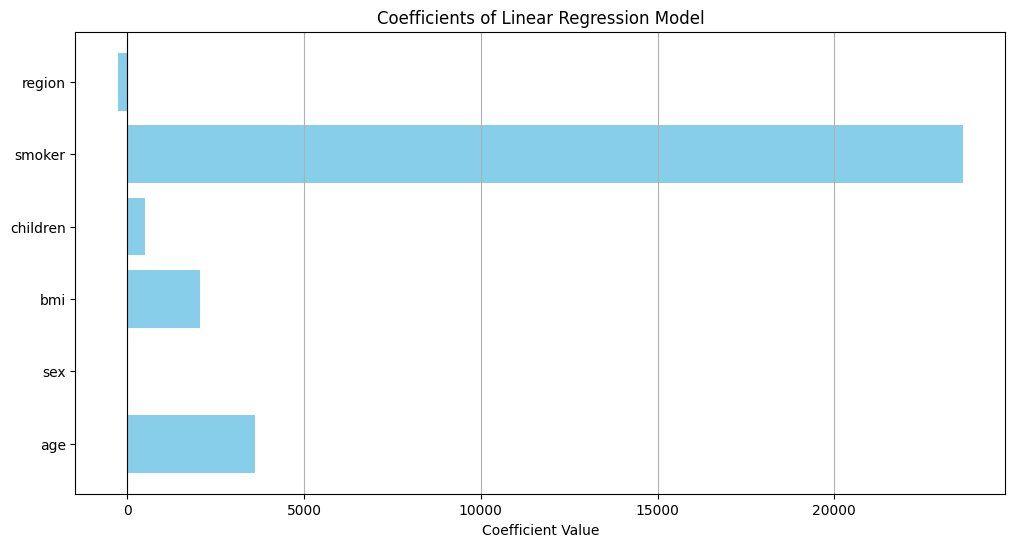

In [120]:
# TODO:
coefficients={}
coef_lists=regr.coef_
for i in range(len(coef_lists)):
    coefficients[columns[i]]=coef_lists[i]
keys=[]
values=[]
for k,v in coefficients.items():
    keys.append(k)
    values.append(v)
print(coefficients)
plt.figure(figsize=(12, 6))
plt.barh(keys, values, color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Coefficients of Linear Regression Model')
plt.axvline(0, color='black', lw=0.8)
plt.grid(axis='x')
plt.show()

# Regularization

L1 regularization, also known as Lasso (Least Absolute Shrinkage and Selection Operator) regularization, is a technique used in regression models that encourages simplicity and sparsity in the model coefficients. This is achieved by adding a penalty equal to the absolute value of the magnitude of coefficients to the loss function.\
</br>
Train a regression model using L1 regularization.

In [121]:
# TODO: Use Lasso from sklearn library
lasso_regression=linear_model.Lasso(alpha=0.1)
lasso_regression.fit(X_train,y_train)


Lasso(alpha=0.1)

L2 regularization, also known as Ridge regularization, is a technique used in regression models to prevent overfitting by adding a penalty equivalent to the square of the magnitude of coefficients to the loss function.
</br>
Train a regression model using L2 regularization.

In [122]:
# TODO: Use Ridge from sklearn library
ridge_reggression=linear_model.Ridge(alpha=0.1)
ridge_reggression.fit(X_train,y_train)


Ridge(alpha=0.1)

Test different regularization parameters (alpha) for each regularization method using cross validation and visualize the coefficients of the variables. Use MAPE for evaluation.

**Mean Absolute Percentage Error (MAPE)**:


 is a widely used metric for evaluating the accuracy of forecasting models. It quantifies the prediction error as a percentage, providing an intuitive measure of how far off predictions are from actual values. MAPE is defined as the average of the absolute percentage errors between predicted values and actual values. The formula for calculating MAPE is:

$$
\text{MAPE} = \frac{100}{N} \sum_{t=1}^{N} \left| \frac{A_t - F_t}{A_t} \right|
$$
    
Where:
- $N$ is the number of observations,
- $A_t$ is the actual value,
- $F_t$ is the forecasted value.

[(0.001, 0.42460603254715423), (0.0011497569953977356, 0.42460603442427036), (0.0013219411484660286, 0.4246060365824979), (0.0015199110829529332, 0.42460603906393485), (0.001747528400007683, 0.42460604191698453), (0.002009233002565048, 0.4246060451972983), (0.0023101297000831605, 0.4246060489688621), (0.0026560877829466868, 0.42460605330524376), (0.0030538555088334154, 0.4246060510378099), (0.003511191734215131, 0.4246060567702658), (0.004037017258596553, 0.4246060528624369), (0.004641588833612782, 0.42460606044044324), (0.005336699231206312, 0.4246060691533088), (0.006135907273413176, 0.4246060791709871), (0.007054802310718645, 0.4246060906888827), (0.008111308307896872, 0.4246061039316638), (0.0093260334688322, 0.4246061191576439), (0.010722672220103232, 0.42460613666382113), (0.012328467394420659, 0.4246061432170546), (0.014174741629268055, 0.42460616635925696), (0.016297508346206444, 0.42460619296716595), (0.01873817422860384, 0.4246062235597954), (0.021544346900318846, 0.424606234

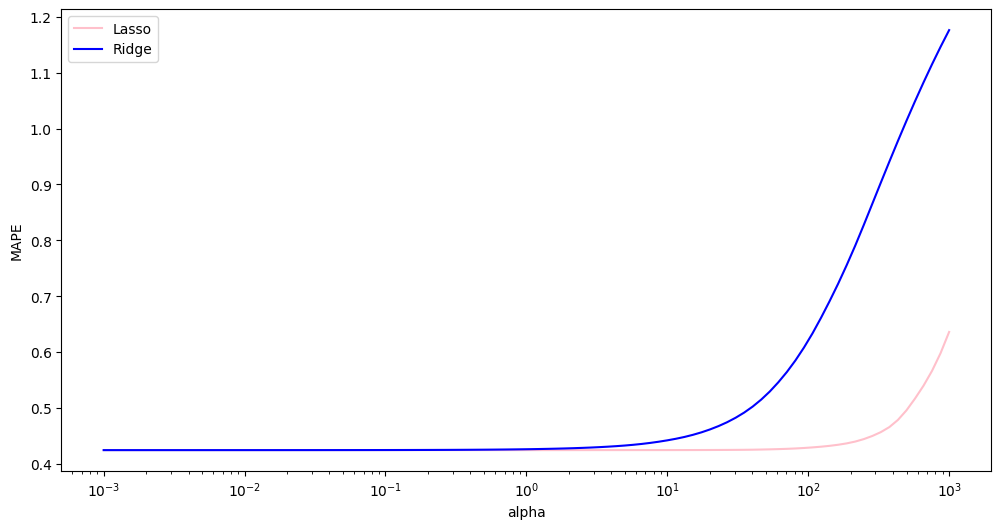

In [123]:
# TODO: Use folding methods and mape from sklearn library
from sklearn.metrics import make_scorer, mean_absolute_percentage_error
kf = KFold(n_splits=5, shuffle=True, random_state=42)
alphas=np.logspace(-3,3,100)
lasso_scores=[]
ridge_scores=[]
for test_alpha in alphas:
     lasso_regression_test=Lasso(alpha=test_alpha)
     ridge_regression_test=Ridge(alpha=test_alpha)
     lasso_regression_test.fit(X_train, y_train)
     ridge_regression_test.fit(X_train,y_train)
     mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)
     scores_lasso = cross_val_score(lasso_regression_test, X, y, cv=kf, scoring=mape_scorer) 
     lasso_scores.append((test_alpha,-np.mean(scores_lasso)))
     scores_ridge = cross_val_score(ridge_regression_test, X, y, cv=kf, scoring=mape_scorer) 
     ridge_scores.append((test_alpha,-np.mean(scores_ridge)))
     
print(lasso_scores)
print(ridge_scores)
plt.figure(figsize=(12, 6))
alpha_values, mape_lasso_values = zip(*lasso_scores)
alpha_values, mape_ridge_values = zip(*ridge_scores)
plt.semilogx(alpha_values, mape_lasso_values, label='Lasso', color='PINK')
plt.semilogx(alpha_values, mape_ridge_values, label='Ridge', color='blue')
plt.xlabel('alpha')
plt.ylabel('MAPE')
plt.legend()
plt.show()

Add extra variables to dataset to make model more complex, then compare the results. 

In [124]:
numerical_columns=['age','bmi','children']
poly=PolynomialFeatures(degree=3,include_bias=False)
X_poly=poly.fit_transform(X[numerical_columns])
X_new=np.concatenate((X_poly, X[categorical_cols]), axis=1)
X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(X_new, y, test_size=0.2, random_state=42)


Report your best model with its evaluated results.

In [125]:
# TODO: Print each model's loss on the training and the test set.
def calculate_mape(y_true, y_hat):
    return np.mean(np.abs((y_true - y_hat) / y_true))
linear_poly = LinearRegression()
lasso_poly = Lasso(alpha=1)
ridge_poly = Ridge(alpha=1)
linear_poly.fit(X_poly_train, y_poly_train)
lasso_poly.fit(X_poly_train, y_poly_train)
ridge_poly.fit(X_poly_train, y_poly_train)
print('Linear polynomial Mape is:',calculate_mape(y_poly_train, linear_poly.predict(X_poly_train)))
print('Linear polynomial Mape  is:',calculate_mape(y_poly_test, linear_poly.predict(X_poly_test)))
print('Ridge polynomial Mape is:', calculate_mape(y_poly_train, ridge_poly.predict(X_poly_train)))
print('Ridge poly Mape test is:', calculate_mape(y_poly_test, ridge_poly.predict(X_poly_test)))
print('lasso polynomial Mape train is:', calculate_mape(y_poly_test, lasso_poly.predict(X_poly_test)))
print('Lasso polynoimal Mape is:', calculate_mape(y_poly_test, lasso_poly.predict(X_poly_test)))


Linear polynomial Mape is: 0.43370295530655023
Linear polynomial Mape  is: 0.4876778934403428
Ridge polynomial Mape is: 0.43526228223976543
Ridge poly Mape test is: 0.4900532145350795
lasso polynomial Mape train is: 0.4876919270506412
Lasso polynoimal Mape is: 0.4876919270506412


## Questions

1. Compare the weight distribution when applying L1/L2 regularization and their sparsity?




- <span style="color:cyan;">**Answer:**lasso regression has panalty term include a coefficient of absolute values of weights so it pay more attention to more important features and don't care to another features but ridge regression has penalty term include a coefficient of power 2 of weights so keep all weights and don't truncate any weight,lasso model is more sparse than lasso</span>


2. How does the regularization parameter (alpha) affect each feature? Does it help to model's explainability?

- <span style="color:cyan;">**Answer:** as we see in plot shows MAPE depends on alpha,know this hyperparameter is important but increasing alpha in ridge increased mape with very high ratio,also risk of underfitting will be increase when we use lasso,but in ridge regression we can reduce effect of features but don't eliminate them</span>

3. How does the regularization affect dimension expansion?

- <span style="color:cyan;">**Answer:**lasso eliminate some features and make model simpler but ridge keep all features and avoid danger of overfitting with smooth some features,regularization can be effective in lasso and ridge and can prevent overfitting</span>

In [126]:
test_path="./InsuranceData_test.csv"
X_testdata = pd.read_csv(test_path)
numerical_col_test = X_testdata.select_dtypes(include=['float', 'int']).columns
scaler = MinMaxScaler()  # for Normalization numerical columns
X_testdata[numerical_col_test] = scaler.fit_transform(X_testdata[numerical_col_test])
scaler_standard = StandardScaler()  # for Standardization numerical columns
X_testdata[numerical_col_test] = scaler_standard.fit_transform(X_testdata[numerical_col_test])

# Mode Imputation for categorical columns
categorical_col_test = X_testdata.select_dtypes(include=['object']).columns
imputer_cat = SimpleImputer(strategy='most_frequent')
X_testdata[categorical_col_test] = imputer_cat.fit_transform(X_testdata[categorical_col_test])
f_test = pd.get_dummies(X_testdata, columns=categorical_col_test, drop_first=True)
#encoding categorical columns
encoder = LabelEncoder()
for col in categorical_col_test:
    X_testdata[col] = encoder.fit_transform(X_testdata[col])
y_predict=regr.predict(X_testdata)
submission_df = pd.DataFrame({'charges': y_predict})
submission_df.to_csv('submission.csv' , index = False)